1. 배깅 (Bagging) - Random Forest

Accuracy: 1.0


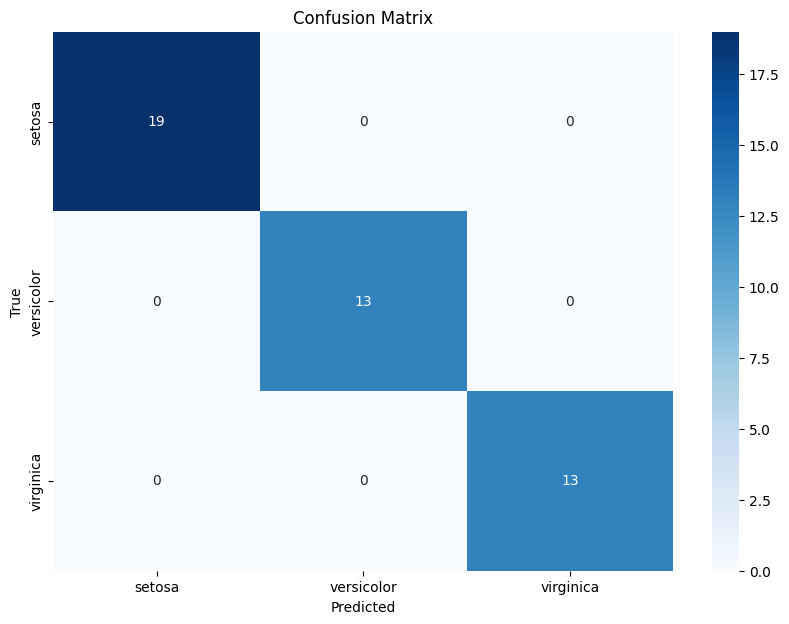

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [1]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest 모델 생성
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 모델 학습
rf.fit(X_train, y_train)

# 예측 수행
y_pred = rf.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=iris.target_names))

2. 부스팅 (Boosting) - Gradient Boosting

Accuracy: 1.0


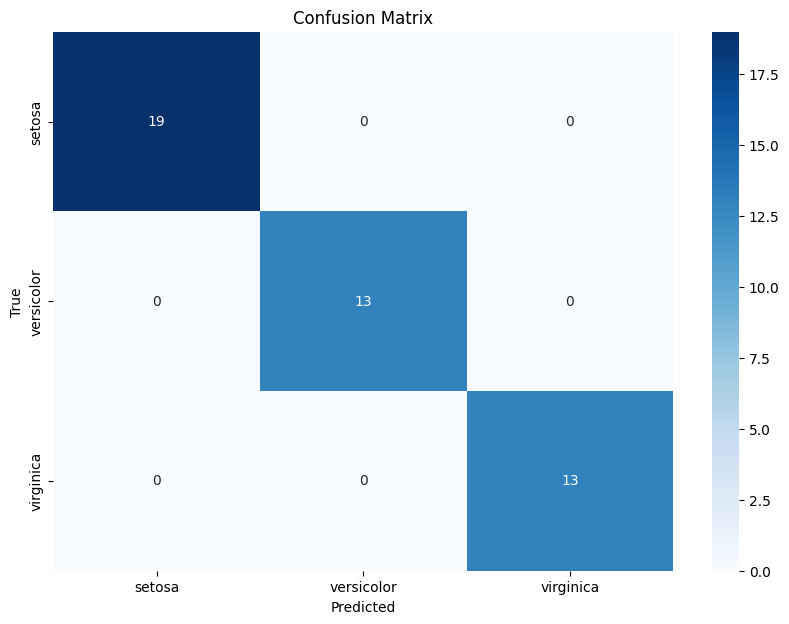

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [2]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gradient Boosting 모델 생성
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# 모델 학습
gb.fit(X_train, y_train)

# 예측 수행
y_pred = gb.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=iris.target_names))


3. 스태킹 (Stacking)


Accuracy: 1.0


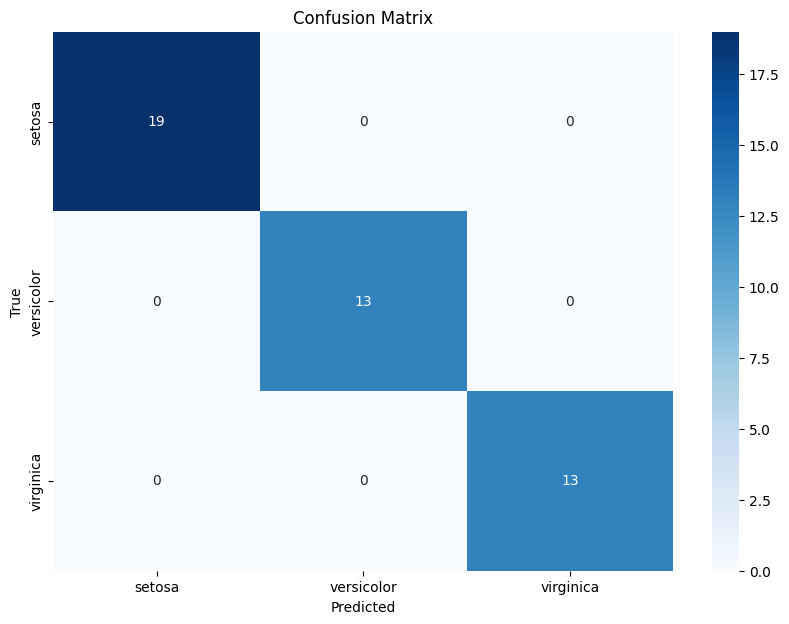

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [3]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 기본 모델 정의
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('svr', SVC(kernel='rbf', probability=True, random_state=42))
]

# 스태킹 모델 생성
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression()) #### 다른점

# 모델 학습
stacking.fit(X_train, y_train)

# 예측 수행
y_pred = stacking.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=iris.target_names))


4. 추천 알고리즘 - 협업 필터링

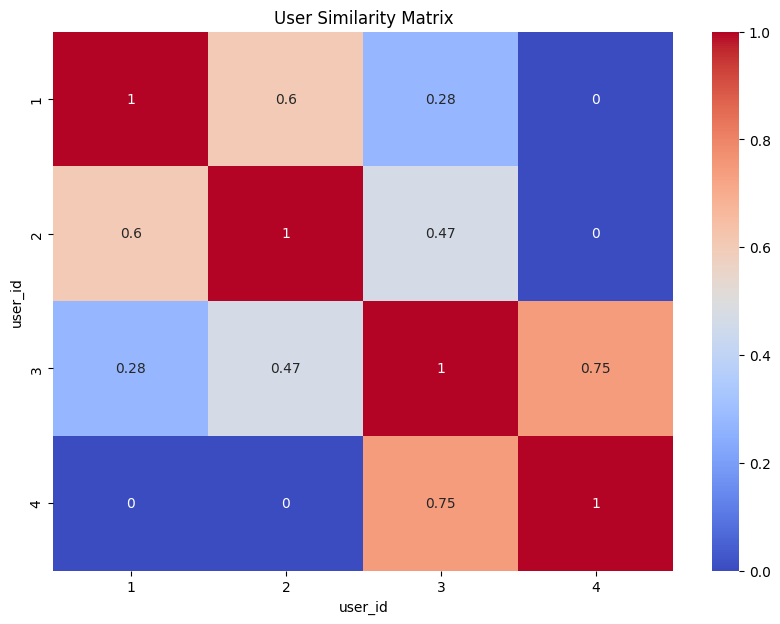

Recommendations for user 1:
item_id
4    2.5
dtype: float64


In [4]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# 예제 사용자-아이템 매트릭스 생성
data = {
    'user_id': [1, 1, 1, 2, 2, 3, 3, 3, 4],
    'item_id': [1, 2, 3, 1, 3, 2, 3, 4, 4],
    'rating': [5, 4, 1, 4, 5, 2, 4, 5, 4]
}
df = pd.DataFrame(data)

# 사용자-아이템 매트릭스 생성
user_item_matrix = df.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)

# 코사인 유사도를 사용하여 사용자 유사도 계산
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# 유사도 매트릭스 시각화
plt.figure(figsize=(10, 7))
sns.heatmap(user_similarity_df, annot=True, cmap='coolwarm')
plt.title('User Similarity Matrix')
plt.show()

# 추천 함수 정의
def recommend(user_id, user_item_matrix, user_similarity, k=2):
    # 유사한 사용자 선택
    similar_users = user_similarity[user_id - 1]
    similar_users_indices = similar_users.argsort()[-k-1:-1]

    # 유사한 사용자들의 아이템 평균 평점 계산
    similar_users_ratings = user_item_matrix.iloc[similar_users_indices]
    recommendations = similar_users_ratings.mean(axis=0)

    # 이미 평가한 아이템 제외
    user_rated_items = user_item_matrix.loc[user_id]
    recommendations = recommendations[user_rated_items == 0]

    return recommendations.sort_values(ascending=False)

# 사용자 1에게 아이템 추천
recommendations = recommend(1, user_item_matrix, user_similarity)
print("Recommendations for user 1:")
print(recommendations)


Q-learning


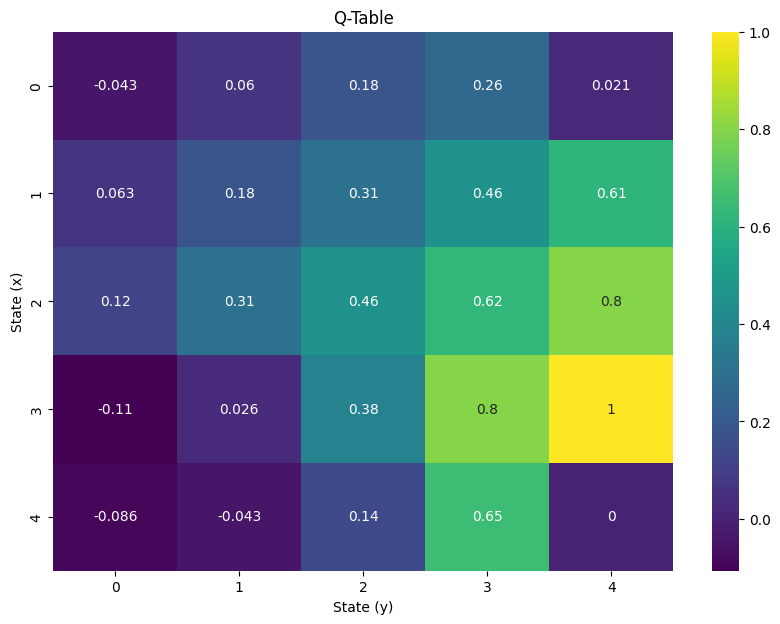

In [6]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그리드월드 환경 정의
class GridWorld:
    def __init__(self, size):
        # 그리드의 크기를 설정합니다.
        self.size = size
        # 초기 상태를 (0, 0)으로 설정합니다.
        self.state = (0, 0)
        # 목표 상태를 그리드의 오른쪽 아래 모서리로 설정합니다.
        self.goal = (size-1, size-1)

    def reset(self):
        # 상태를 초기 상태로 리셋합니다.
        self.state = (0, 0)
        return self.state

    def step(self, action):
        # 현재 상태의 x, y 좌표를 가져옵니다.
        x, y = self.state
        # 행동에 따라 새로운 상태를 결정합니다.
        if action == 0:
            x = max(0, x - 1)  # 위로 이동
        elif action == 1:
            x = min(self.size - 1, x + 1)  # 아래로 이동
        elif action == 2:
            y = max(0, y - 1)  # 왼쪽으로 이동
        elif action == 3:
            y = min(self.size - 1, y + 1)  # 오른쪽으로 이동

        # 새로운 상태를 설정합니다.
        self.state = (x, y)
        # 새로운 상태가 목표 상태인지 확인합니다.
        reward = 1 if self.state == self.goal else -0.1
        done = self.state == self.goal
        # 새로운 상태, 보상, 완료 여부를 반환합니다.
        return self.state, reward, done

# Q-learning 파라미터 설정
size = 5  # 그리드의 크기
env = GridWorld(size)  # 그리드월드 환경 생성
q_table = np.zeros((size, size, 4))  # Q-테이블 초기화 (상태-행동 가치 함수)
alpha = 0.1  # 학습률
gamma = 0.9  # 할인 인자
epsilon = 0.1  # 탐험 확률
episodes = 1000  # 학습 에피소드 수

# Q-learning 알고리즘
for episode in range(episodes):
    state = env.reset()  # 에피소드 시작 시 상태를 초기화
    done = False  # 에피소드가 끝났는지 여부

    while not done:
        if np.random.rand() < epsilon:
            action = np.random.choice(4)  # 탐험: 무작위로 행동 선택
        else:
            action = np.argmax(q_table[state[0], state[1]])  # 활용: Q-값이 최대인 행동 선택

        next_state, reward, done = env.step(action)  # 환경에서 행동 수행
        q_value = q_table[state[0], state[1], action]  # 현재 상태의 Q-값
        best_next_q_value = np.max(q_table[next_state[0], next_state[1]])  # 다음 상태에서의 최대 Q-값

        # Q-테이블 업데이트
        q_table[state[0], state[1], action] = q_value + alpha * (reward + gamma * best_next_q_value - q_value)

        state = next_state  # 상태 업데이트

# Q-테이블 시각화
# Q-learning 알고리즘에서 사용하는 상태-행동 가치 함수(State-Action Value Function)를 저장하는 테이블
# Q-테이블의 각 항목은 특정 상태에서 특정 행동을 취했을 때의 기대 보상을 나타냄
plt.figure(figsize=(10, 7))
sns.heatmap(np.max(q_table, axis=2), annot=True, cmap='viridis')
plt.title('Q-Table')
plt.xlabel('State (y)')
plt.ylabel('State (x)')
plt.show()


5. 하이퍼 파라미터 튜닝 (Hyperparameter Tuning) - Grid Search


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.01

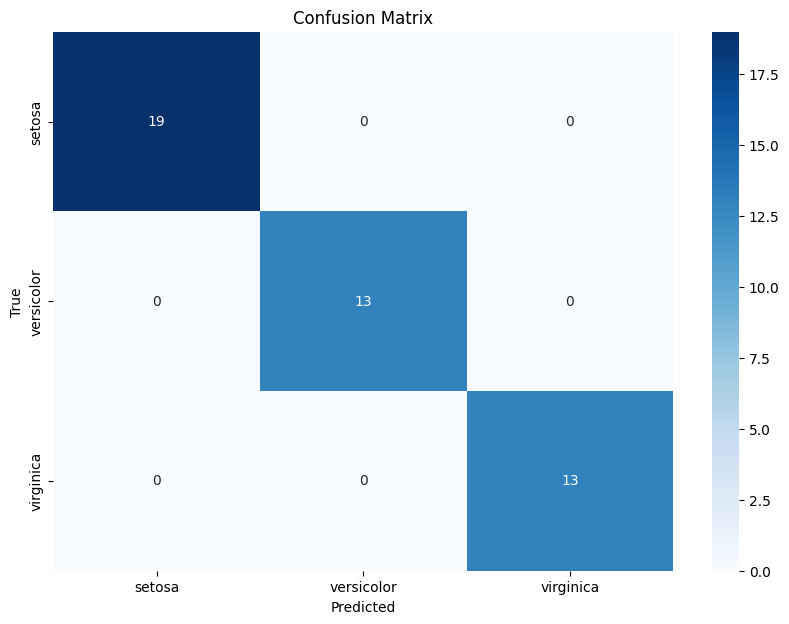

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [7]:
# 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

# 학습 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM 모델 생성
svc = SVC()

# 하이퍼 파라미터 그리드 정의
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Grid Search
grid = GridSearchCV(svc, param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# 최적 하이퍼 파라미터 출력
print(f'Best Parameters: {grid.best_params_}')

# 테스트 데이터로 예측 수행
y_pred = grid.predict(X_test)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# 혼동 행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 분류 리포트 출력
print(classification_report(y_test, y_pred, target_names=iris.target_names))
